## How are in-demand skills trending for Data Analysts ?

##### Methodology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import ast
# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else [])
                    )

In [ ]:
df_DA_ind = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()
df_DA_ind['job_posted_month_no'] = df_DA_ind['job_posted_date'].dt.month
df_DA_ind_exploded = df_DA_ind.explode('job_skills')

In [ ]:
df_DA_ind_pivot = df_DA_ind_exploded.pivot_table(index = 'job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_ind_pivot.loc['Total']= df_DA_ind_pivot.sum()
df_DA_ind_pivot = df_DA_ind_pivot[df_DA_ind_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_ind_pivot = df_DA_ind_pivot.drop('Total')

In [23]:
df_DA_ind_total = df_DA_ind.groupby('job_posted_month_no').size()

In [31]:
df_DA_ind_percent =df_DA_ind_pivot.div(df_DA_ind_total/100, axis=0)

In [32]:
df_DA_ind_percent = df_DA_ind_percent.reset_index()
df_DA_ind_percent['Month'] = (df_DA_ind_percent['job_posted_month_no'].apply(
    lambda x: pd.to_datetime(x, format='%m').strftime('%b')))
df_DA_ind_percent = df_DA_ind_percent.set_index('Month')
df_DA_ind_percent = df_DA_ind_percent.drop(columns='job_posted_month_no')
df_DA_ind_percent


job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
Month,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.000000,0.000000,0.000000,0.159236,0.000000,0.0,0.000000,0.000000,0.00000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.236967,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.359712,0.000000,0.000000,0.000000,0.000000,0.0,0.359712,0.000000,0.00000
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.27248
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.161812,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000


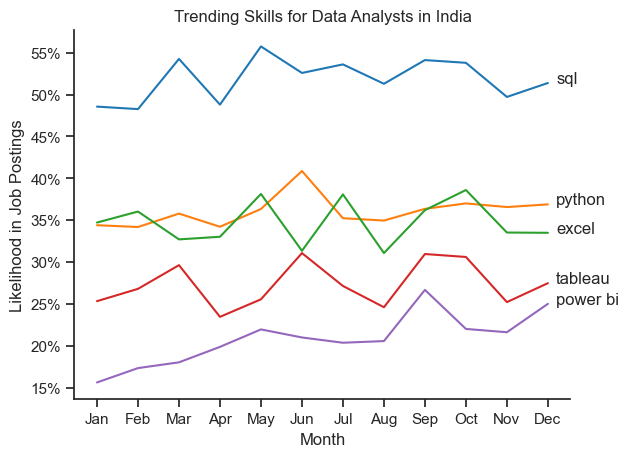

In [42]:
df_plot = df_DA_ind_percent.iloc[:, :5]

sns.set_theme(style='ticks')
sns.lineplot(data= df_plot, dashes=False, palette='tab10', legend=False)
sns.despine()

plt.title('Trending Skills for Data Analysts in India')
plt.ylabel('Likelihood in Job Postings')

from matplotlib.ticker import PercentFormatter
ax= plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1,i], df_plot.columns[i])

plt.show()